In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo
import data_describe as dd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('../data/S&P 500 Information Technology 200-Day.csv')
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)
data = data.sort_values(by=['date'])
data = data.dropna()
data

,date,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),S&P 500 Information Technology (Sector) Outperform/Underperform,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services
4178,2009-12-02,1109.24,355.410004,-2.929002,-2.622063,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4179,2009-12-03,1099.92,354.839996,-3.497166,-2.639520,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4180,2009-12-04,1105.98,357.910004,-2.494975,-1.238960,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4181,2009-12-07,1103.25,355.589996,-1.918512,-1.873726,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4182,2009-12-08,1091.94,353.459991,-4.938755,-4.503827,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
...,...,...,...,...,...,...,...,...,...,...,...,...
7194,2021-11-24,4701.46,2986.290039,19.548197,29.429586,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7195,2021-11-26,4594.62,2908.629883,16.437110,25.513728,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7196,2021-11-29,4655.27,2985.409912,19.324593,31.957657,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7197,2021-11-30,4567.00,2956.850098,17.908879,31.321002,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038


## Using all data

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dow'] = data['date'].dt.dayofweek
data = data[data['dow']==3].groupby(['year','month']).nth[1].reset_index()
data

,year,month,date,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),S&P 500 Information Technology (Sector) Outperform/Underperform,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,2009,12,2009-12-10,1102.35,358.239990,-3.951381,-3.118154,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193,3
1,2010,1,2010-01-14,1148.46,374.720001,-2.941027,-4.305630,UNDERPERFORM,217.281,84.849,99.258,99.515,97.230,100.487,3
2,2010,2,2010-02-11,1078.47,346.339996,-9.326551,-11.695264,UNDERPERFORM,217.353,84.868,99.067,99.560,96.987,100.634,3
3,2010,3,2010-03-11,1150.24,371.410004,-8.476491,-8.164575,OUTPERFORM,217.403,84.840,98.406,99.533,96.655,100.714,3
4,2010,4,2010-04-08,1186.44,380.880005,-7.551331,-8.904351,UNDERPERFORM,217.290,84.738,97.553,99.159,95.488,100.615,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,7,2021-07-08,4320.82,2631.409912,1.147999,4.851673,OUTPERFORM,273.092,76.056,48.787,111.434,37.720,138.174,3
140,2021,8,2021-08-12,4460.83,2705.919922,7.276877,9.539439,OUTPERFORM,274.214,76.337,49.162,111.585,37.528,138.552,3
141,2021,9,2021-09-09,4493.28,2773.729980,15.209058,19.661516,OUTPERFORM,276.590,76.407,48.847,111.577,37.419,138.623,3
142,2021,10,2021-10-14,4438.26,2716.439941,8.483351,8.657163,OUTPERFORM,278.524,76.317,48.278,111.427,37.366,138.439,3


In [4]:
original = data[['S&P 500 Information Technology (Sector) Outperform/Underperform','month','overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]

In [5]:
data.drop(columns=['date','S&P 500 Information Technology (Sector) Outperform/Underperform','year'], inplace=True)
data.head()

,month,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,12,1102.35,358.239990,-3.951381,-3.118154,217.488,84.972,100.047,100.483,98.952,101.193,3
1,1,1148.46,374.720001,-2.941027,-4.305630,217.281,84.849,99.258,99.515,97.230,100.487,3
2,2,1078.47,346.339996,-9.326551,-11.695264,217.353,84.868,99.067,99.560,96.987,100.634,3
3,3,1150.24,371.410004,-8.476491,-8.164575,217.403,84.840,98.406,99.533,96.655,100.714,3
4,4,1186.44,380.880005,-7.551331,-8.904351,217.290,84.738,97.553,99.159,95.488,100.615,3


In [6]:
original['Performance'] = np.where(original['S&P 500 Information Technology (Sector) Outperform/Underperform'] == 'OUTPERFORM',1,0)
original = original[['Performance','month','overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]

In [7]:
dd.data_summary(original)

,Info
Rows,144
Columns,8
Size in Memory,9.1 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,0,1,0.22,0.42,2,112
month,int64,0,0,1,6.50,12,6.50,3.45,12,12
overall,float64,0,0,217.20,238.025,280.13,241.74,14.75,142,2
communication,float64,0,0,72.92,79.92,84.97,78.97,4.10,142,2
information technology commodities,float64,0,0,46.58,61.98,100.047,66.77,15.78,144,1
video and audio,float64,0,0,97.82,100.24,111.58,102.29,3.65,139,2
video and audio products,float64,0,0,36.47,58.68,98.95,60.0095,19.0049,143,2
video and audio services,float64,0,0,100.49,114.62,138.62,117.34,11.22,143,2


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

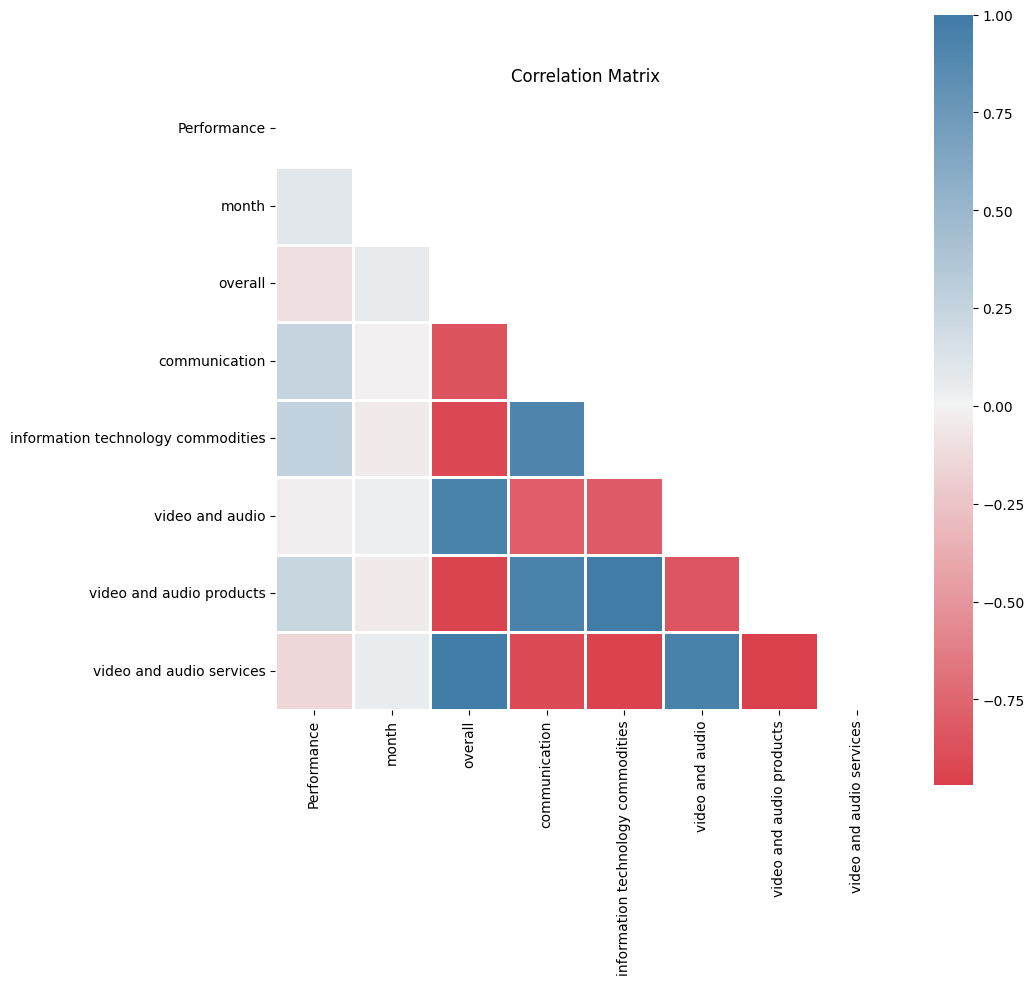

In [8]:
dd.correlation_matrix(original)

### Conditional GAN

In [9]:
discrete_columns = [
    'month'
]

ctgan = CTGAN(epochs=5000)
ctgan.fit(data, discrete_columns)

# Synthetic copy
samples = ctgan.sample(10000)
samples

,month,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,5,1233.796051,329.393529,-3.724152,10.061775,220.914222,82.156580,78.021549,98.478132,75.823454,109.594012,3
1,11,2696.097742,2813.508077,-1.511442,-8.571510,270.910608,74.894669,49.924400,108.398155,39.281546,131.876021,3
2,10,2945.829220,1453.833869,-17.128605,-20.984406,264.119621,74.462745,47.854551,106.198430,41.466985,134.495258,3
3,11,1094.755034,262.680862,-16.282435,-16.748332,212.802097,84.383394,91.825374,99.113399,99.784807,100.104035,3
4,12,2754.785510,747.444797,-6.498056,3.320086,241.195604,81.876091,75.809991,100.607095,71.491844,115.826308,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10,3949.374976,1369.187245,-8.020972,-13.867796,257.624314,73.365137,50.109473,104.767343,38.178925,125.547502,3
9996,8,1292.888172,425.745848,-9.248765,-10.936641,227.189478,82.861308,74.535867,98.832607,69.030753,108.653715,3
9997,10,1999.485650,1453.258561,-7.686711,-17.308498,254.977042,72.389121,54.958627,106.414868,64.431109,129.111633,3
9998,2,2905.100166,1352.539144,2.203075,-12.642840,242.064141,72.955608,50.104345,105.192961,33.219978,122.432534,3


In [10]:
samples['Performance'] = np.where(samples['S&P 500 Information Technology (Sector) Performance (%)'] > \
                                  samples['S&P 500 Performance (%)'], 1, 0)

In [11]:
samples = samples[['Performance','month', 'overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]
samples.head()

,Performance,month,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services
0,1,5,220.914222,82.156580,78.021549,98.478132,75.823454,109.594012
1,0,11,270.910608,74.894669,49.924400,108.398155,39.281546,131.876021
2,0,10,264.119621,74.462745,47.854551,106.198430,41.466985,134.495258
3,0,11,212.802097,84.383394,91.825374,99.113399,99.784807,100.104035
4,1,12,241.195604,81.876091,75.809991,100.607095,71.491844,115.826308


In [12]:
dd.data_summary(samples)

,Info
Rows,10000
Columns,8
Size in Memory,625.1 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,0,1,0.38,0.48,2,6232
month,int64,0,0,1,7,12,6.51,3.46,12,877
overall,float64,0,0,202.48,238.081,281.17,240.0027,15.60,9998,2
communication,float64,0,0,70.72,80.16,86.94,78.78,3.93,10000,1
information technology commodities,float64,0,0,37.62,62.63,111.11,66.61,16.17,10000,1
video and audio,float64,0,0,96.68,100.44,114.46,102.60,3.98,10000,1
video and audio products,float64,0,0,27.29,63.30,117.64,61.95,19.55,10000,1
video and audio services,float64,0,0,92.039,116.65,148.45,118.33,11.81,10000,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

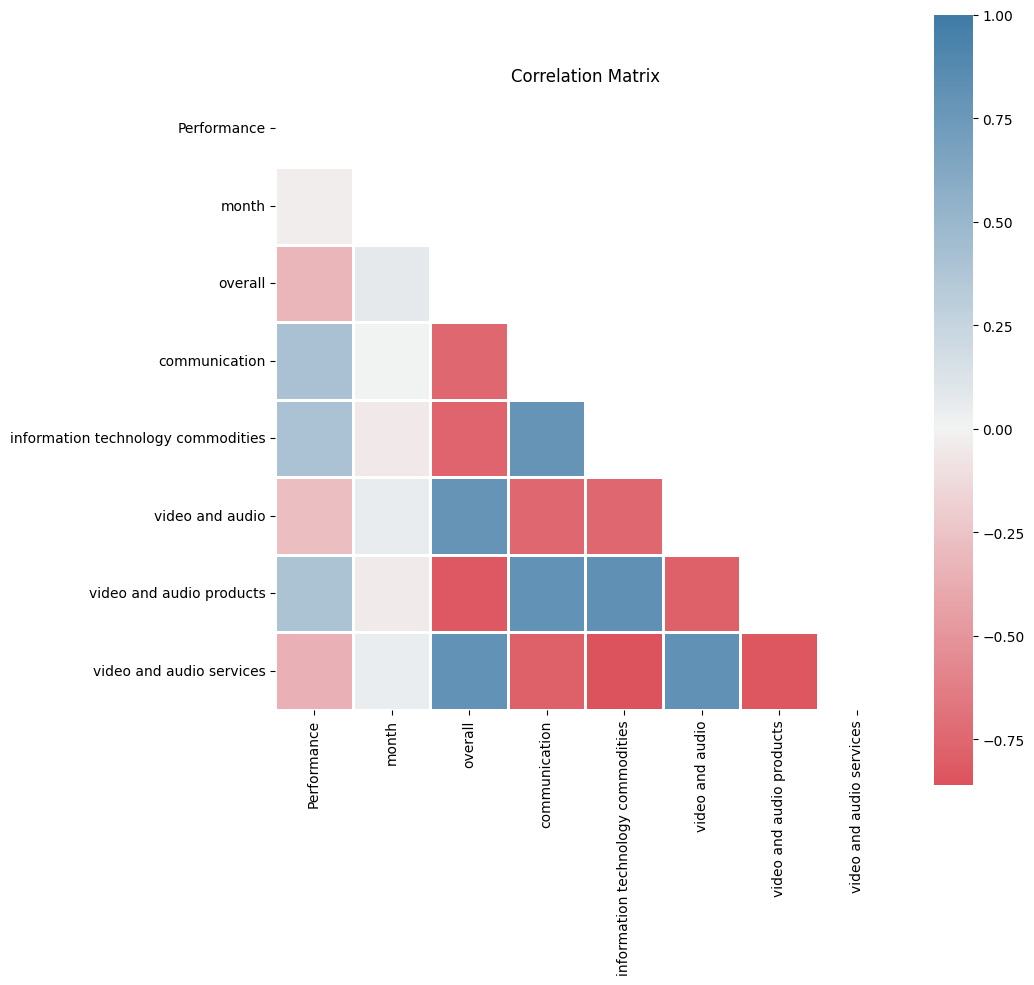

In [13]:
dd.correlation_matrix(samples)

In [14]:
X = samples.drop(['Performance'],axis=1)
y = samples['Performance']

### SMOTE Oversampling

In [15]:
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 6232, 1: 3768})
Counter({1: 6232, 0: 6232})


### Interaction Terms

In [16]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_poly = poly.fit_transform(X.drop(['month'],axis=1))
X_poly

array([[  220.91422171,    82.15657953,    78.02154911, ...,
         7466.95211955, 10792.61359822,  8309.79656696],
       [  270.91060827,    74.89466863,    49.92439999, ...,
         4258.0470949 , 14295.11730395,  5180.29395279],
       [  264.11962148,    74.46274459,    47.85455091, ...,
         4403.72871601, 14283.18522369,  5577.11289282],
       ...,
       [  250.8843212 ,    73.72612572,    53.80171312, ...,
         7680.19219833, 12611.08156001,  9641.748365  ],
       [  258.12926722,    72.4962892 ,    57.97990754, ...,
         7214.1876577 , 12820.40289331,  8424.39039904],
       [  223.73492443,    82.59802885,    82.80957146, ...,
         7790.80886277, 10994.09309524,  8786.73796411]])

In [17]:
month = X['month'].to_numpy()
month = np.reshape(month,(-1,1))
X = np.append(X_poly,month,1)
X.shape

(12464, 22)

In [18]:
X_real = original.drop(['Performance'],axis=1)
y_real = original['Performance']
X_real_poly = poly.fit_transform(X_real.drop(['month'],axis=1))
month = X_real['month'].to_numpy()
month = np.reshape(month,(-1,1))
X_real = np.append(X_real_poly,month,1)
X_real.shape

(144, 22)

In [19]:
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X_real = stscaler.transform(X_real)

### Training with CV

In [20]:
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(GaussianNB())

k_fold = StratifiedKFold(n_splits=10)

Model_Comparison = pd.DataFrame(columns=['Name', 'CV Mean Accuracy', 'CV Mean Precision', 'CV Mean Recall',\
                                         'CV Mean F-1 Score', \
                                         'Accuracy', 'Precision', 'Recall', 'F-1 Score',\
                                        'Accuracy Real', 'Precision Real', 'Recall Real', 'F-1 Score Real'])
row = 0
for clf in classifiers:
    name = clf.__class__.__name__
    Model_Comparison.loc[row, 'Name'] = name
    
    Model_Comparison.loc[row, 'CV Mean Accuracy'] = cross_val_score(clf, X, y, scoring = 'accuracy', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Precision'] = cross_val_score(clf, X, y, scoring = 'precision',\
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Recall'] = cross_val_score(clf, X, y, scoring = 'recall', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean F-1 Score'] = cross_val_score(clf, X, y, scoring = 'f1', \
                                                                 cv = k_fold, n_jobs = 10).mean()

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    Model_Comparison.loc[row, 'Accuracy'] = accuracy_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Precision'] = precision_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Recall'] = recall_score(y_test, y_pred)
    Model_Comparison.loc[row, 'F-1 Score'] = f1_score(y_test, y_pred)
    
    y_pred = clf.predict(X_real)
    Model_Comparison.loc[row, 'Accuracy Real'] = accuracy_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Precision Real'] = precision_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Recall Real'] = recall_score(y_real, y_pred)
    Model_Comparison.loc[row, 'F-1 Score Real'] = f1_score(y_real, y_pred)
    
    row += 1
Model_Comparison

,Name,CV Mean Accuracy,CV Mean Precision,CV Mean Recall,CV Mean F-1 Score,Accuracy,Precision,Recall,F-1 Score,Accuracy Real,Precision Real,Recall Real,F-1 Score Real
0,KNeighborsClassifier,0.717112,0.691045,0.783068,0.733689,0.712452,0.688851,0.776282,0.729958,0.659722,0.373134,0.78125,0.505051
1,DecisionTreeClassifier,0.682695,0.673633,0.705897,0.688241,0.678113,0.665675,0.717308,0.690528,0.618056,0.323077,0.65625,0.43299
2,RandomForestClassifier,0.776084,0.769862,0.786129,0.776391,0.778241,0.773442,0.787821,0.780565,0.708333,0.416667,0.78125,0.543478
3,AdaBoostClassifier,0.706997,0.713683,0.691437,0.702218,0.719833,0.727936,0.703205,0.715357,0.673611,0.380952,0.75,0.505263
4,GradientBoostingClassifier,0.722,0.731233,0.702189,0.716324,0.72208,0.72859,0.708974,0.718648,0.673611,0.384615,0.78125,0.515464
5,ExtraTreesClassifier,0.793176,0.781405,0.812125,0.794841,0.788511,0.784227,0.796795,0.790461,0.736111,0.446429,0.78125,0.568182
6,BaggingClassifier,0.741742,0.756538,0.711346,0.732,0.739089,0.755997,0.707051,0.730706,0.680556,0.383333,0.71875,0.5
7,SVC,0.699132,0.703322,0.689027,0.696016,0.709884,0.708651,0.714103,0.711367,0.694444,0.40625,0.8125,0.541667
8,GaussianNB,0.687099,0.686799,0.688226,0.687416,0.69448,0.690955,0.705128,0.69797,0.659722,0.355932,0.65625,0.461538


### Voting Classifier

In [21]:
et_clf = ExtraTreesClassifier(random_state=random_state)
bag_clf = BaggingClassifier(random_state=random_state)
rf_clf = RandomForestClassifier(random_state=random_state)
classifiers = [('RF', rf_clf), \
               ('ET', et_clf),\
              ('Bagging', bag_clf)]

vc = VotingClassifier(estimators = classifiers, voting = 'soft')     
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
vc_res = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-1 Score'])
vc_res.loc[0, 'Accuracy'] = accuracy_score(y_test, y_pred)
vc_res.loc[0, 'Precision'] = precision_score(y_test, y_pred)
vc_res.loc[0, 'Recall'] = recall_score(y_test, y_pred)
vc_res.loc[0, 'F-1 Score'] = f1_score(y_test, y_pred)
vc_res

,Accuracy,Precision,Recall,F-1 Score
0,0.777279,0.771985,0.787821,0.779822
